In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp

import warnings
warnings.filterwarnings("ignore")

colours = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108'];
axtitle_dict = {'family': 'serif','color':  '#010D36','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

In [2]:
df= pd.read_csv('proj_sql_data.csv')
df

,user_id,Yearly_avg_view_on_travel_page,frequentflyer,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,annual_incom_class,member_in_family,booking_hotal,preferred_location_type,working_flag,travelling_rating
0,100001,97,0,Desktop,168,11,Avera,3,Yes,OTHER,1,3
1,100002,67,0,Mobile,875,8,Low,3,No,OTHER,1,2
2,100003,76,1,Mobile,67,10,Avera,5,Yes,Beach,1,1
3,100004,64,1,Mobile,249,10,High,1,No,Big Cities,1,3
4,100005,21,1,Mobile,695,4,High,3,Yes,OTHER,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,109996,35,1,Mobile,97,8,High,2,No,Historical Site,1,2
9996,109997,92,0,Mobile,61,1,Avera,5,Yes,OTHER,1,5
9997,109998,6,0,Desktop,535,1,High,1,No,OTHER,1,2
9998,109999,96,0,Desktop,16,4,Avera,2,Yes,Big Cities,1,1


In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 10000 rows and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   user_id                                  10000 non-null  int64 
 1   Yearly_avg_view_on_travel_page           10000 non-null  int64 
 2   frequentflyer                            10000 non-null  int64 
 3   preferred_device                         10000 non-null  object
 4   total_likes_on_outstation_checkin_given  10000 non-null  int64 
 5   yearly_avg_Outstation_checkins           10000 non-null  int64 
 6   annual_incom_class                       10000 non-null  object
 7   member_in_family                         10000 non-null  int64 
 8   booking_hotal                            10000 non-null  object
 9   preferred_location_type                  10000 non-null  object
 10  working_flag                             10000 non-null  in

# Exploratory Data Analysis


### | Data Cleaning

In [5]:
cat_columns= df.select_dtypes(exclude=['int64', 'float64'] )

for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'preferred_device':
['Desktop' 'Mobile']

Value counts for column 'annual_incom_class':
['Avera' 'Low' 'High']

Value counts for column 'booking_hotal':
['Yes' 'No']

Value counts for column 'preferred_location_type':
['OTHER' 'Beach' 'Big Cities' 'Trekking' 'Islands' 'Hill Station'
 'Tech Cities' 'Historical Site']



In [6]:
#Let's first fix the multiple values in preferred device
# Define a mapping for replacement
device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()

array(['Desktop', 'Mobile'], dtype=object)

In [7]:
# "yearly_avg_Outstation_checkins" has '* ' in it, Let's replace it with NAN
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([11,  8, 10,  4,  3,  2, 15, 13,  6, 12,  0,  1, 14,  9,  7,  5],
      dtype=int8)

In [8]:
# "following_company_page" column has "Three", let's change it to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

# Post changing, let's fix the datatype
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([3, 5, 1, 4, 2], dtype=int8)

In [9]:
df['working_flag']= df['working_flag'].replace('0','No')
df['working_flag'].unique()

array([1, 0], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   user_id                                  10000 non-null  int64 
 1   Yearly_avg_view_on_travel_page           10000 non-null  int64 
 2   frequentflyer                            10000 non-null  int64 
 3   preferred_device                         10000 non-null  object
 4   total_likes_on_outstation_checkin_given  10000 non-null  int64 
 5   yearly_avg_Outstation_checkins           10000 non-null  int8  
 6   annual_incom_class                       10000 non-null  object
 7   member_in_family                         10000 non-null  int8  
 8   booking_hotal                            10000 non-null  object
 9   preferred_location_type                  10000 non-null  object
 10  working_flag                             10000 non-null  in

In [11]:
num_columns = df.select_dtypes(exclude=['object']).drop(columns=['user_id'])

#Negative values : The dataset features can not have negative values, hence let's see.
negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


### | Missing Values

In [12]:
#- Below are the columns & corresponding missing values
df = df.applymap(lambda x: np.nan if x == 'nan' else x) #Replacing all string NaN values to Np.nan, in case any

In [13]:
#Let's see how much are the missing values from the datset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 0, which is 0.00% of total data.


In [14]:
# Lets check count & % of missing values in the dataset
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

In [15]:
#Let's check missing values post treatmenr
print('Missing Values in the dataset after treatment :', df.isnull().sum().sum())

Missing Values in the dataset after treatment : 0


### | Duplicate Values

In [16]:
df.duplicated().sum()

0

### | Descriptive Summary

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,105000.5000,2886.895680,100001.0,102500.75,105000.5,107500.25,110000.0
Yearly_avg_view_on_travel_page,10000.0,50.4843,29.058665,1.0,25.00,50.0,76.00,100.0
frequentflyer,10000.0,0.4941,0.499990,0.0,0.00,0.0,1.00,1.0
total_likes_on_outstation_checkin_given,10000.0,502.3671,290.230548,0.0,248.00,503.0,753.00,999.0
yearly_avg_Outstation_checkins,10000.0,7.4479,4.567732,0.0,4.00,7.0,11.00,15.0
member_in_family,10000.0,3.0034,1.425129,1.0,2.00,3.0,4.00,5.0
working_flag,10000.0,0.9485,0.221026,0.0,1.00,1.0,1.00,1.0
travelling_rating,10000.0,2.9934,1.422237,1.0,2.00,3.0,4.00,5.0


In [18]:
df.select_dtypes(include = ['object']).describe().T

,count,unique,top,freq
preferred_device,10000,2,Mobile,5031
annual_incom_class,10000,3,Avera,4523
booking_hotal,10000,2,Yes,5080
preferred_location_type,10000,8,OTHER,3877


# Data Visualization


In [19]:
fig = px.pie(
    df.assign(ClassMap=df.working_flag.map({0: "Not Working", 1: "Working"})),
    names="ClassMap", hole=0.5, color_discrete_sequence=["#79a5db", "#e0a580"]
)
fig.update_layout(
    height=450, width=600, font_color="#28838a", title_font_size=16, showlegend=False,
)
fig.add_annotation(
    x=0.5, y=0.5, align="center", xref="paper", yref="paper", showarrow=False, font_size=20, text="Target<br>Overview",
)
fig.update_traces(
    hovertemplate=None, textposition="outside", texttemplate="%{label}<br>%{value} - %{percent}",
    textfont_size=16, rotation=-20, marker_line_width=25, marker_line_color='#ffffff',
)
fig.show()

### | Distribution of Numerical variables

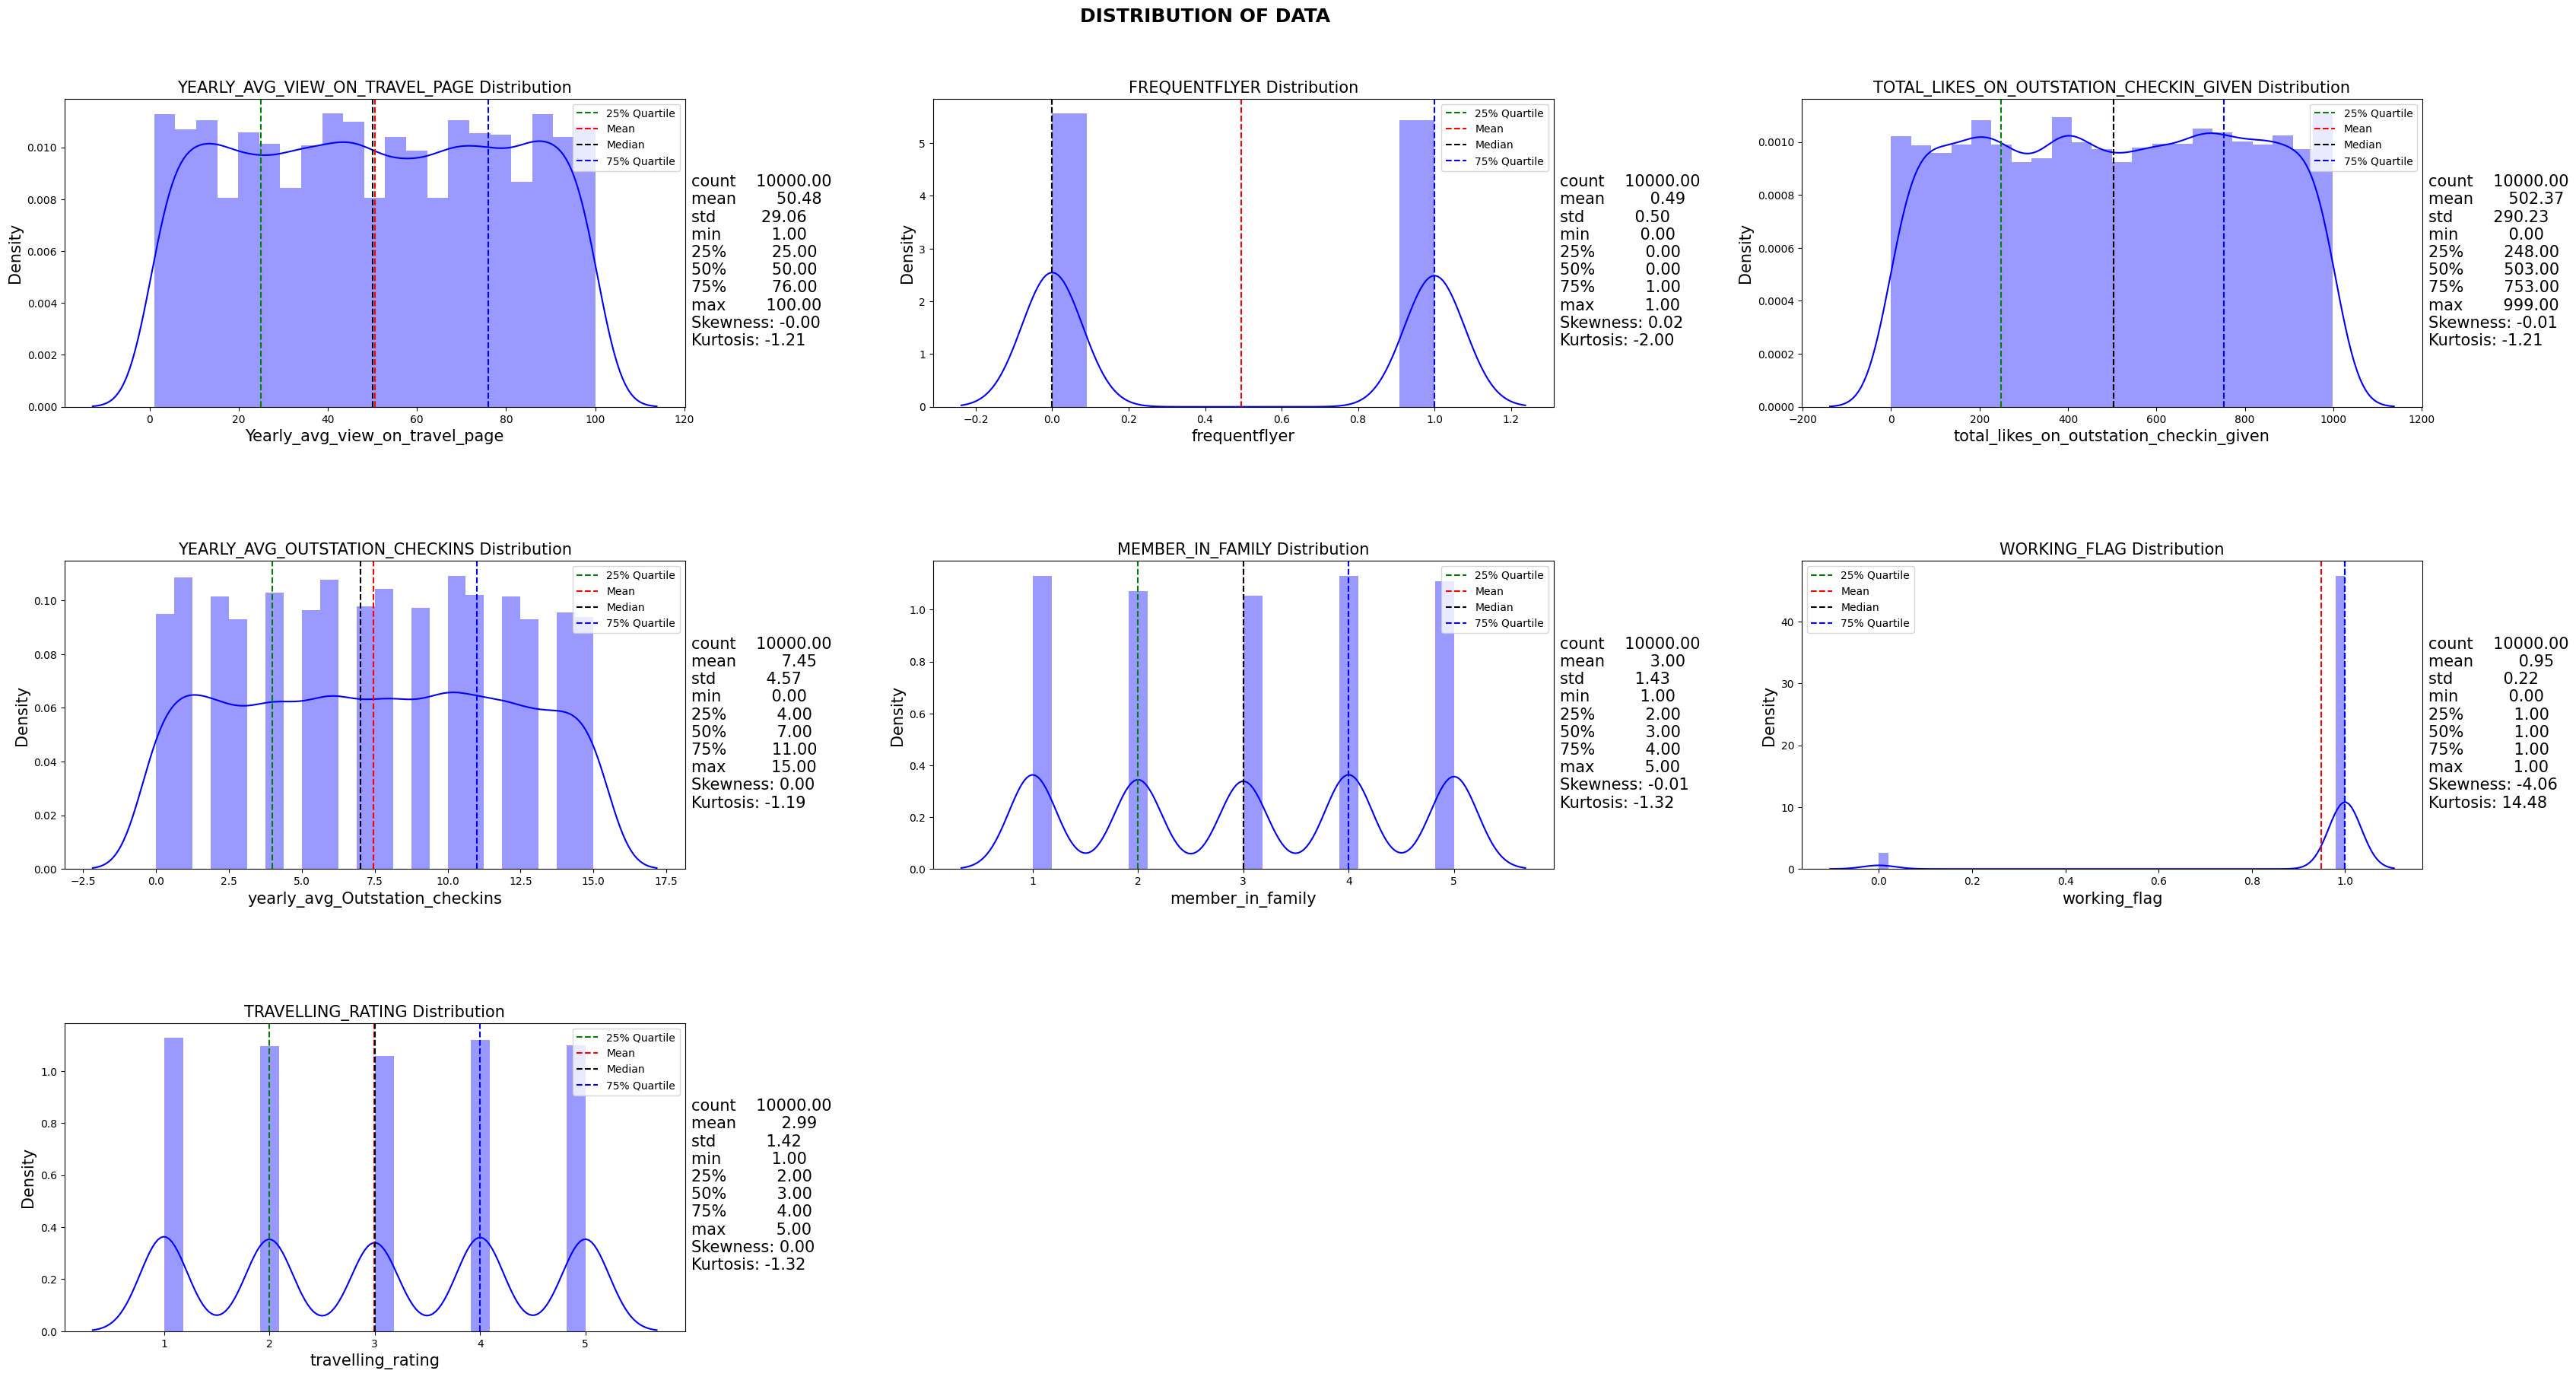

In [20]:
# Selecting numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('user_id')

# Plotting the distribution of numerical columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[40, 20])
fig.suptitle('DISTRIBUTION OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(num_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    # Plot the histogram
    sns.distplot(df[col], color='blue', ax=ax)
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
    skewness = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)
    description_lines = [line for line in str(df[col].describe().round(2)).split('\n') if 'Name' not in line and 'dtype' not in line]
    description_text = '\n'.join(description_lines)
    description_text += f"\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    ax.annotate(description_text, xy=(1.01, 0.2), xycoords='axes fraction', fontsize=15)
    ax.set_xlabel(f'{col}', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_title(f'{col.upper()} Distribution', fontsize=15)
    ax.legend(fontsize=10)
plt.show()

### | Distribution of Categorical variables

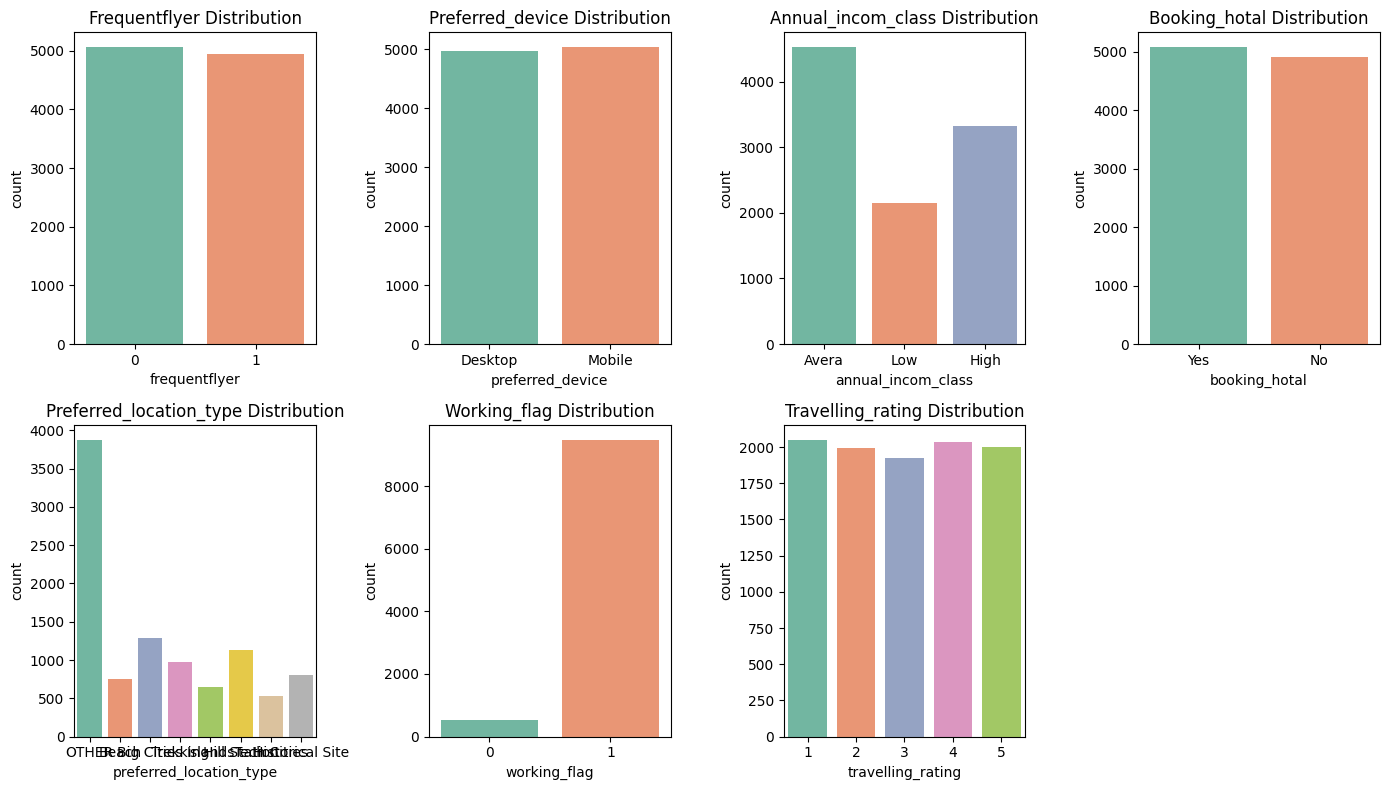

In [21]:
# Define the categorical columns
categorical_columns = ['frequentflyer', 'preferred_device', 'annual_incom_class', 'booking_hotal', 'preferred_location_type', 'working_flag', 'travelling_rating']

# Define the color palette
custom_palette = "Set2"  # You can choose any palette available in Seaborn

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, palette=custom_palette)
    plt.title(col.capitalize() + " Distribution")

plt.tight_layout()
plt.show()

In [22]:
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = df[cols].value_counts()
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},
        color_discrete_sequence=[colors]
    )
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(
        values=percentage, 
        names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, 
        hole=0.5, 
        color_discrete_sequence=colors
    )
    fig.add_annotation(
        x=0.5, 
        y=0.5, 
        align="center", 
        xref="paper",
        yref="paper", 
        showarrow=False, 
        font_size=15, 
        text=f'{cols}'
    )
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
    
cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    univariateAnalysis_category(col)

Distribution of preferred_device
----------------------------------------------------------------


       
Distribution of annual_incom_class
----------------------------------------------------------------


       
Distribution of booking_hotal
----------------------------------------------------------------


       
Distribution of preferred_location_type
----------------------------------------------------------------


### | Bivariate Analysis of Numeric Features

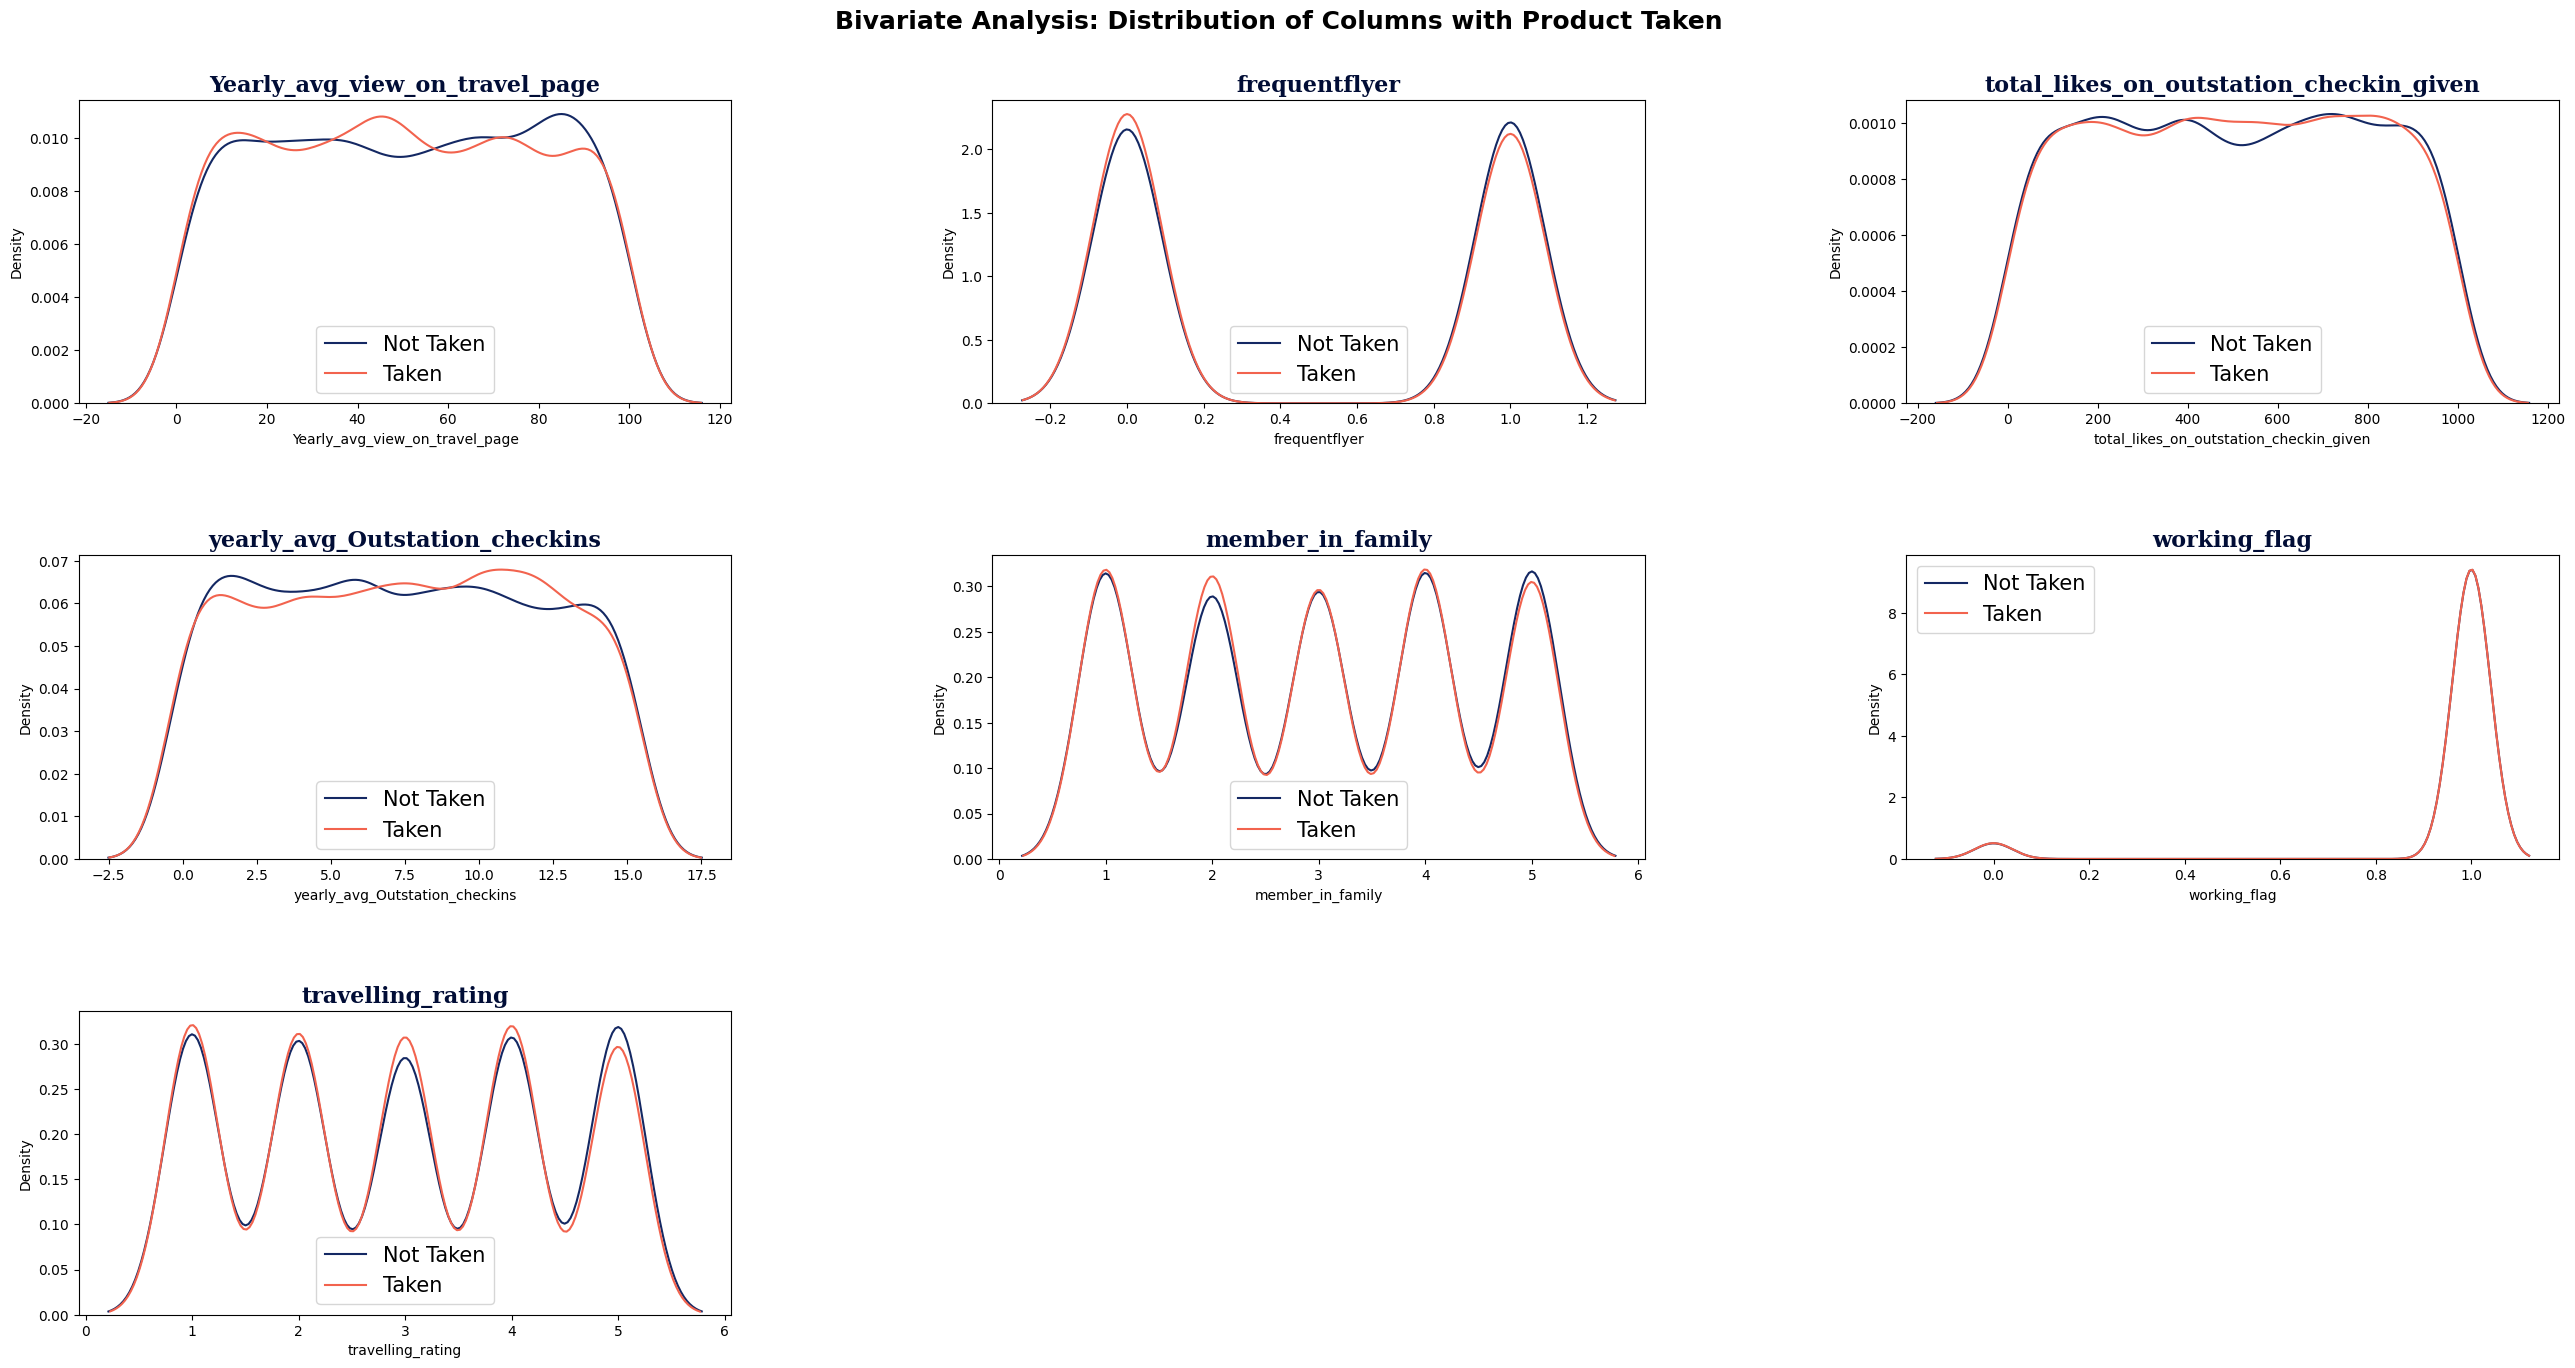

In [23]:
# Define numeric columns excluding the 'user_id'
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('user_id')

# Create the figure
fig = plt.figure(figsize=[32, 15])
fig.suptitle('Bivariate Analysis: Distribution of Columns with Product Taken', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Iterate over each numeric column
for i, col in enumerate(num_columns, 1):
    a = fig.add_subplot(3, 3, i)
    
    # Plot distribution for 'Not Taken' products
    sns.distplot(df[df['booking_hotal'] == "No"][col], color='#142863', ax=a, hist=False, label='Not Taken')
    
    # Plot distribution for 'Taken' products
    sns.distplot(df[df['booking_hotal'] == "Yes"][col], color='#f2634e', ax=a, hist=False, label='Taken')
    
    a.set_title(col, fontdict=axtitle_dict)
    a.legend(fontsize=15)

plt.show()

### | Outlier Treatment

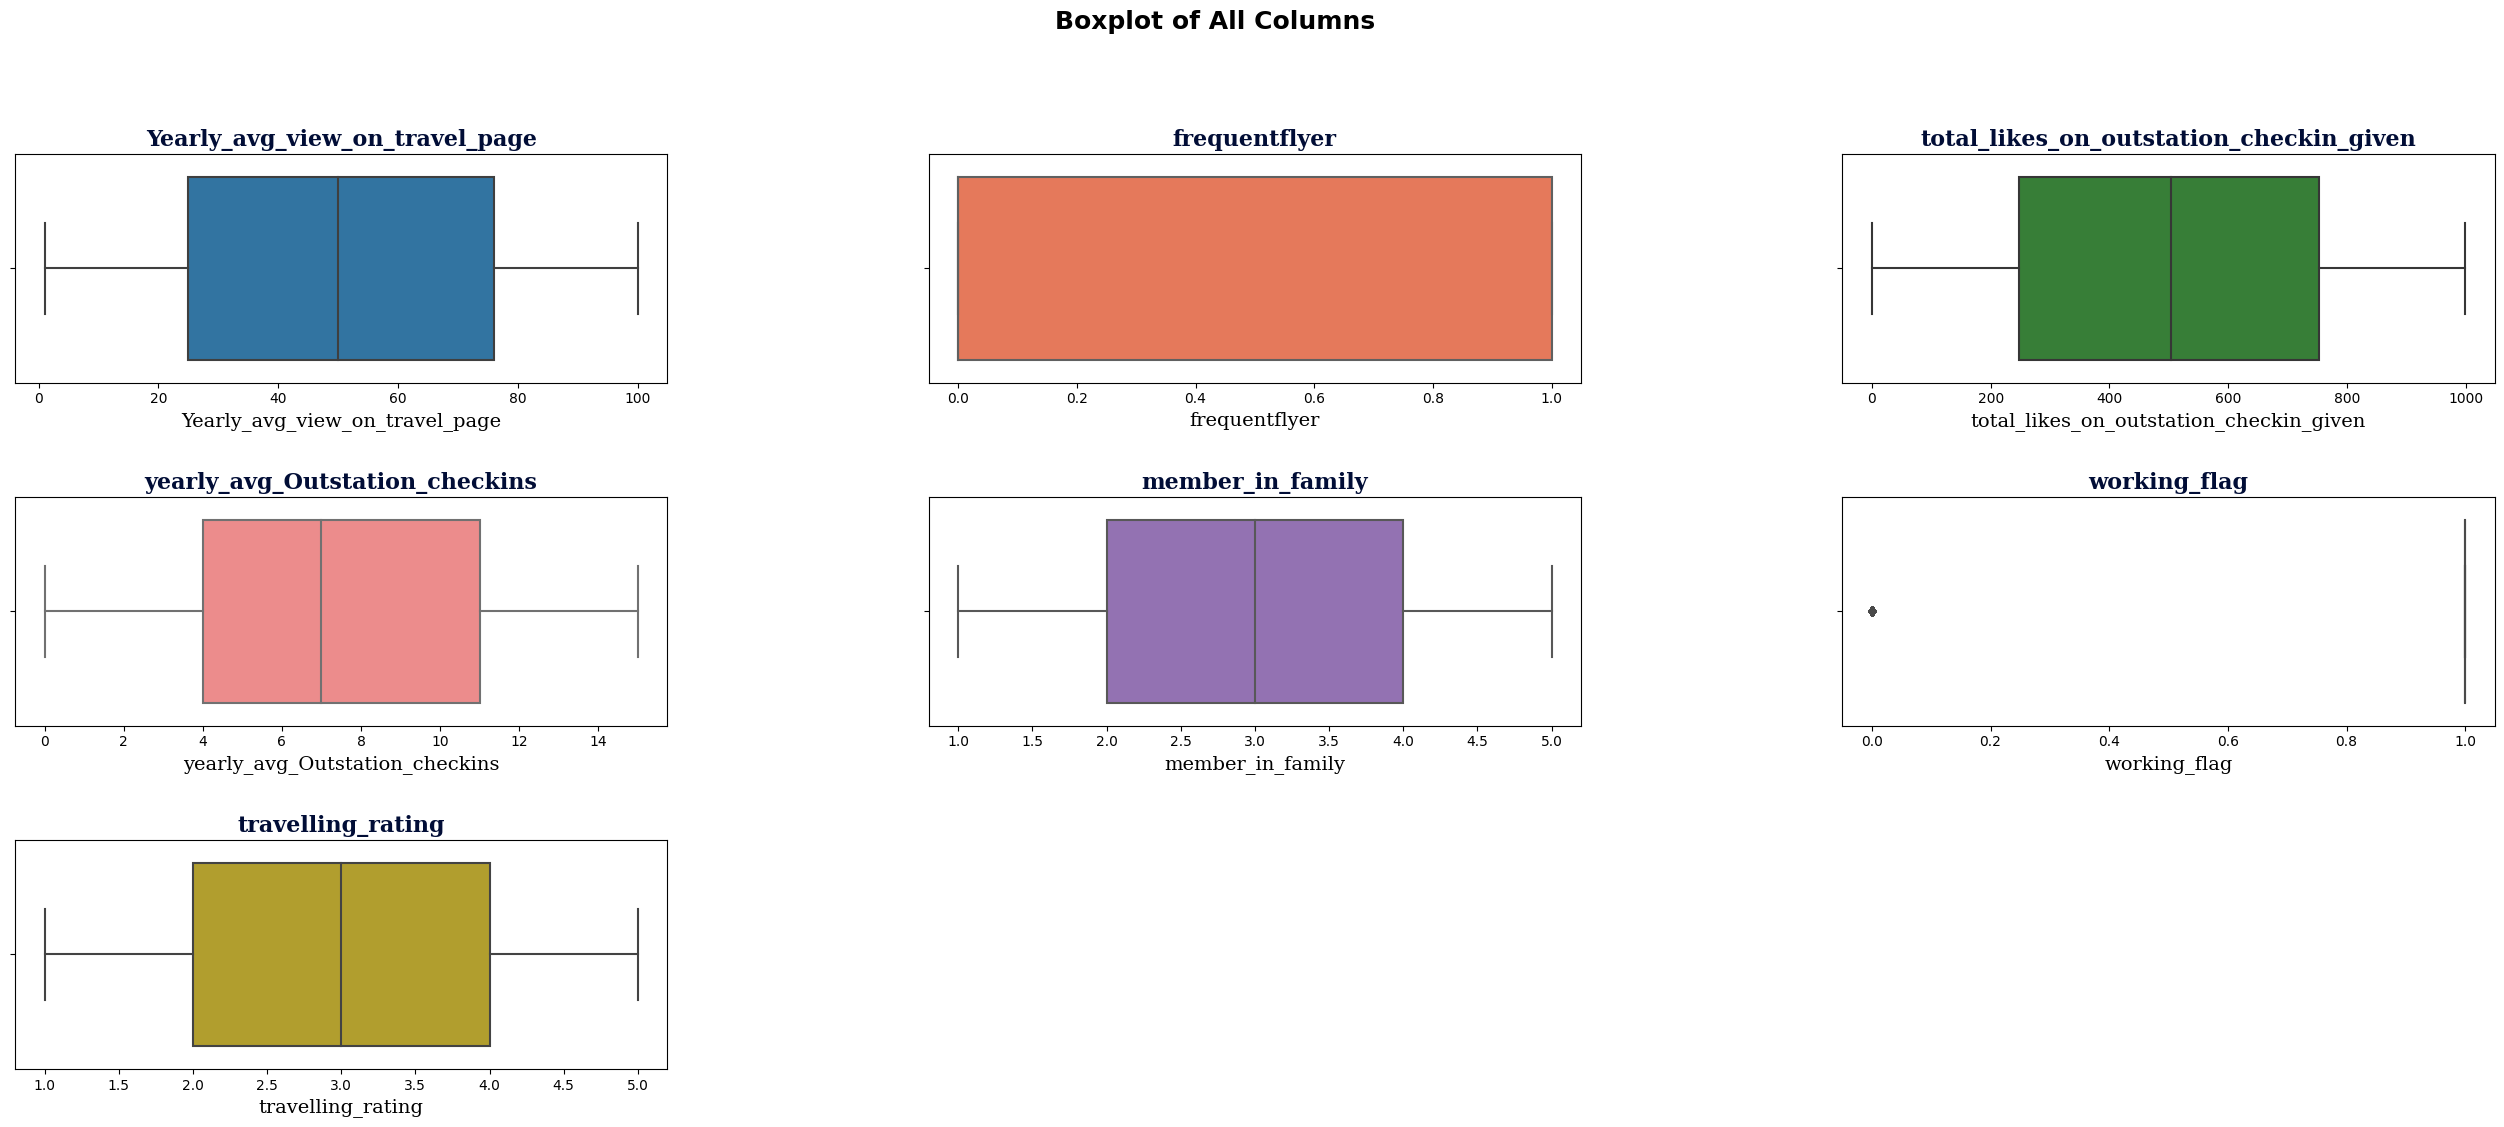

In [24]:
# Set the background color of plots to white
plt.rcParams['axes.facecolor'] = 'white'

# Create a figure for the boxplots
fig = plt.figure(figsize=[32, 24])
fig.suptitle('Boxplot of All Columns', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Iterate over each numeric column
for i, col in enumerate(num_columns):
    ax1 = fig.add_subplot(6, 3, i + 1)
    ax1 = sns.boxplot(data=df, x=col, color=colours[i])
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

plt.show()

In [25]:
# Define the quantiles for upper and lower limits
Q5 = df[num_columns].quantile(0.05)
Q95 = df[num_columns].quantile(0.95)
UL = Q95
LL = Q5

# Find observations beyond upper and lower limits for each column
outliers = ((df[num_columns] > UL) | (df[num_columns] < LL)).sum()

print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


Yearly_avg_view_on_travel_page             842
frequentflyer                                0
total_likes_on_outstation_checkin_given    991
yearly_avg_Outstation_checkins               0
member_in_family                             0
working_flag                                 0
travelling_rating                            0
dtype: int64

In [26]:
# Function which returns the Upper and Lower limit to detect outliers for each feature
def treat_outlier(col):
    q5, q95 = np.percentile(col, [5, 95])
    return q5, q95

# Loop through numeric columns and treat outliers
for i in num_columns:
    LR, UR = treat_outlier(df[i])
    df[i] = np.where(df[i] > UR, UR, df[i])
    df[i] = np.where(df[i] < LR, LR, df[i])

# Display the DataFrame after outlier treatment
print(df)

      user_id  Yearly_avg_view_on_travel_page  frequentflyer preferred_device  \
0      100001                            96.0            0.0          Desktop   
1      100002                            67.0            0.0           Mobile   
2      100003                            76.0            1.0           Mobile   
3      100004                            64.0            1.0           Mobile   
4      100005                            21.0            1.0           Mobile   
...       ...                             ...            ...              ...   
9995   109996                            35.0            1.0           Mobile   
9996   109997                            92.0            0.0           Mobile   
9997   109998                             6.0            0.0          Desktop   
9998   109999                            96.0            0.0          Desktop   
9999   110000                            40.0            0.0          Desktop   

      total_likes_on_outsta

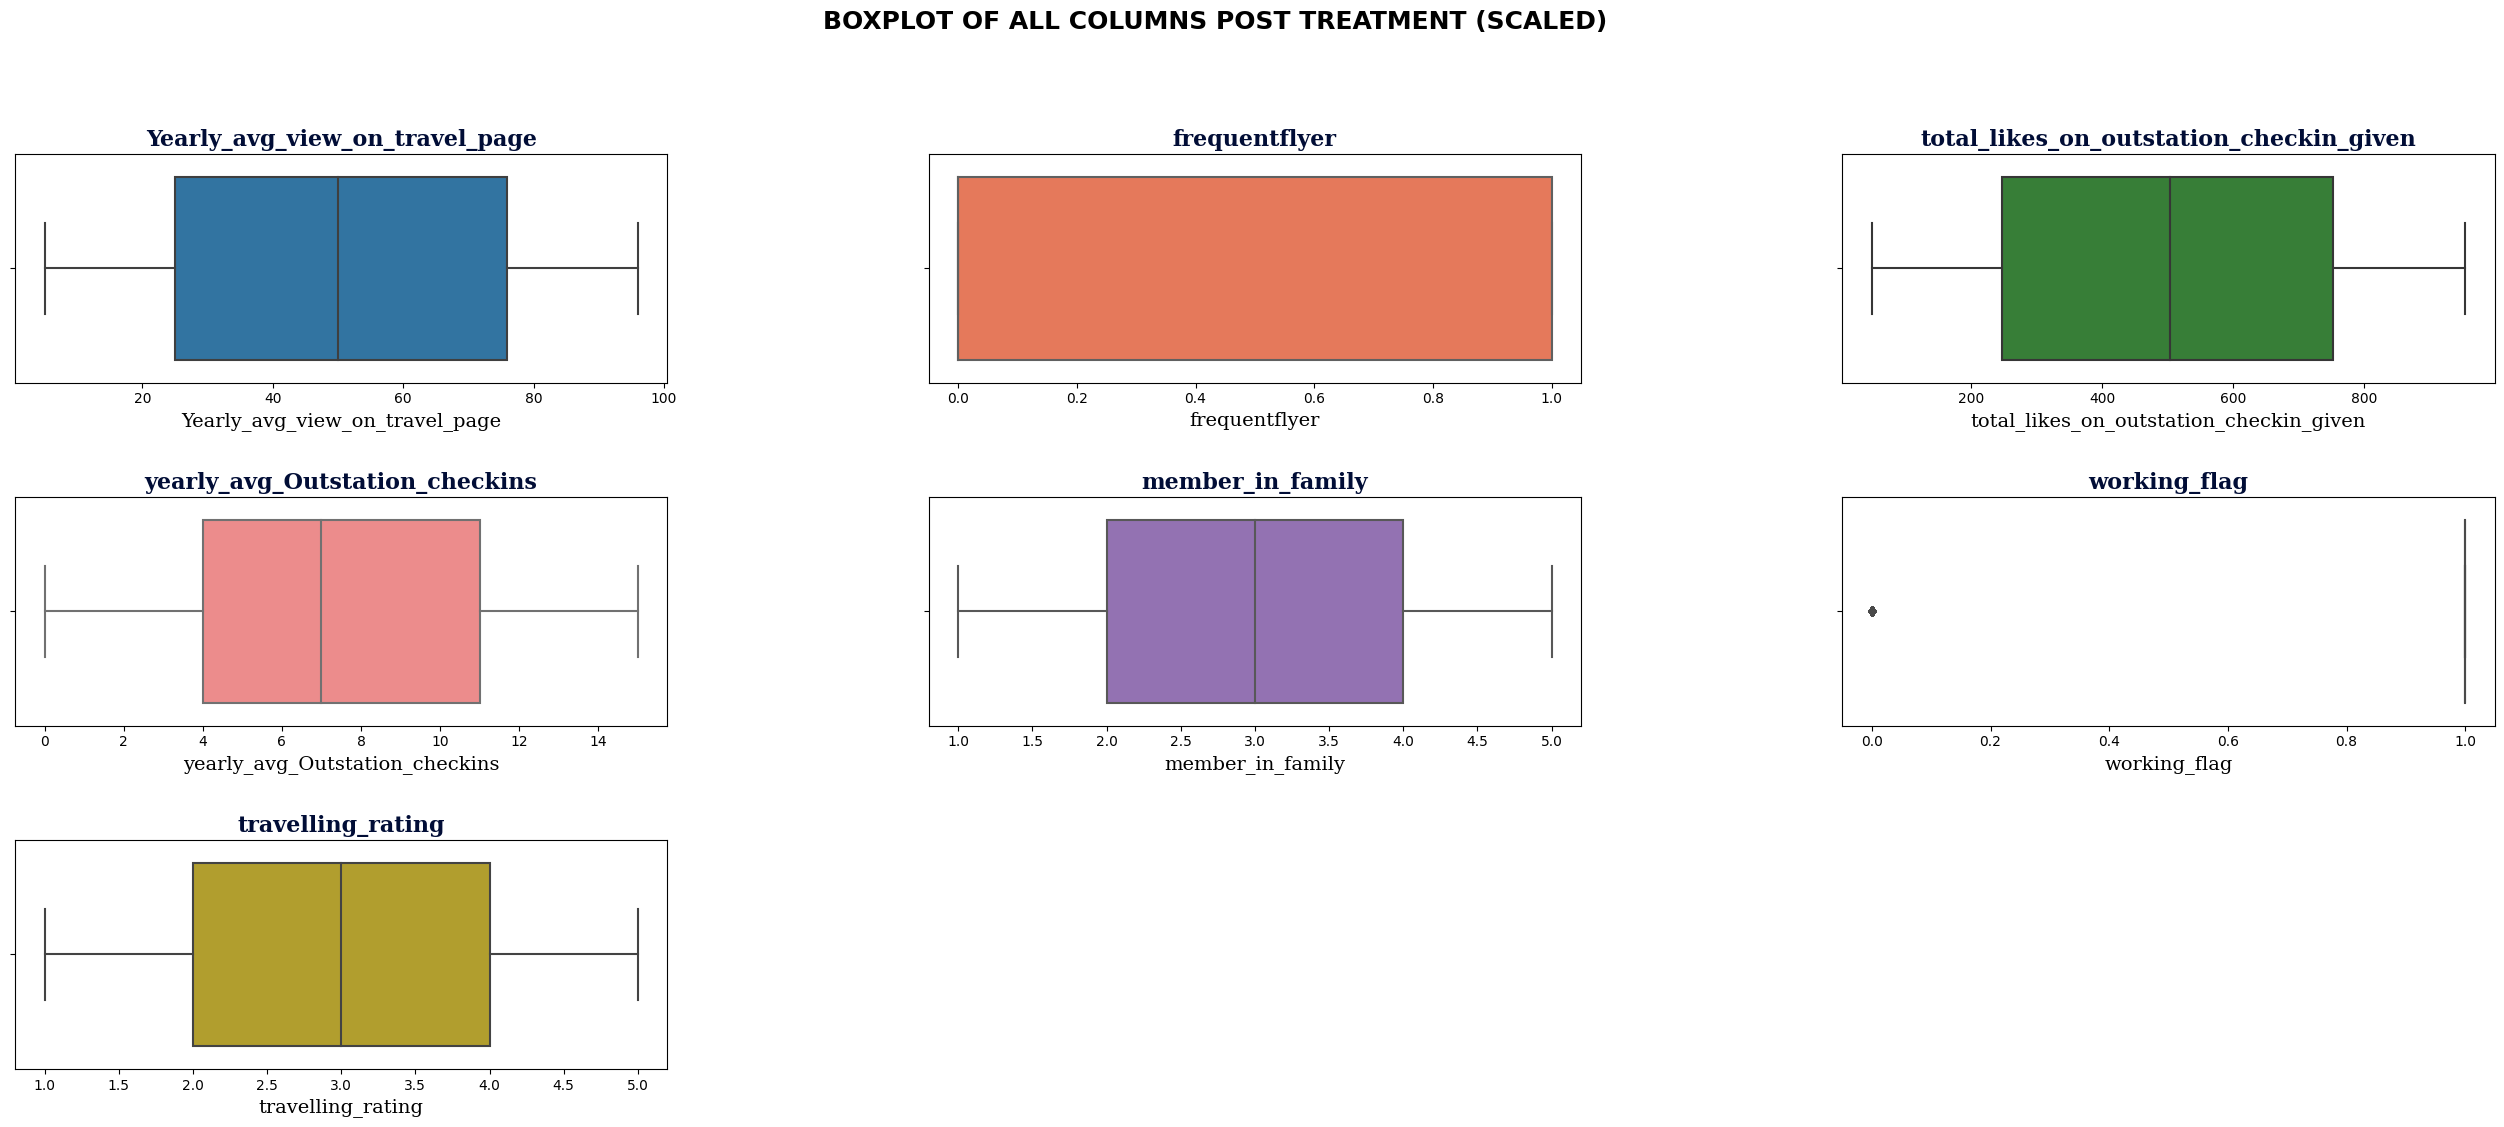

In [27]:
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32, 24])
fig.suptitle('BOXPLOT OF ALL COLUMNS POST TREATMENT (SCALED)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(num_columns):
    ax1 = fig.add_subplot(6, 3, i+1)
    sns.boxplot(data=df, x=col, color=colours[i], ax=ax1)
    ax1.set_title(col, fontdict=axtitle_dict)
    ax1.set_xlabel(col, fontdict=axlab_dict)

plt.show()

In [28]:

cleaned_data = df.dropna()

# Save the cleaned and visualized data to a CSV file
cleaned_data.to_csv('cleaned_and_visualized_data.csv', index=False)

# Print a message indicating the successful export
print('Data exported successfully!')

Data exported successfully!
